# IBM Applied Data Science Capstone Course by Coursera
### Week 5 Final Report
##Chennai Metro Station Clustering
- A residential location near chennai Metro stations are most wanted and we will find out which metro station is best suited for residential purpose.
- Get the geographical coordinates of the neighborhoods
- Obtain the venue data for the neighborhoods from Foursquare API
- Explore and cluster the neighborhoods
- Select the best cluster to open a new Coffee shop
***
### 1. Import libraries

In [1]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         392 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch

In [2]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.3.0               |     pyhd3deb0d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36he6145b8_1001         347 KB  conda-forge
    chardet-3.0.4              |py36h9880bd3_1008         194 KB  conda-forge
    cryptography-3.2.1         |   py36h6ec43e4

In [4]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import folium # map rendering library

In [5]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,city,Names,Latitudes,Longitudes
0,1,chennai,AG - DMS metro station,13.045515,80.248436
1,2,chennai,Anna Nagar East metro station,13.085080,80.218646
2,3,chennai,Anna Nagar Tower metro station,13.085226,80.208746
3,4,chennai,Arignar Anna Alandur metro station,13.004859,80.201483
4,5,chennai,Arumbakkam metro station,13.085245,80.201590


In [6]:
Metro_list.shape

(34, 5)

In [7]:
Metro_list

,Unnamed: 0,city,Names,Latitudes,Longitudes
0,1,chennai,AG - DMS metro station,13.045515,80.248436
1,2,chennai,Anna Nagar East metro station,13.085080,80.218646
2,3,chennai,Anna Nagar Tower metro station,13.085226,80.208746
3,4,chennai,Arignar Anna Alandur metro station,13.004859,80.201483
4,5,chennai,Arumbakkam metro station,13.085245,80.201590
5,6,chennai,Ashok Nagar metro station,13.035452,80.211194
6,7,chennai,Chennai International Airport metro station,12.981076,80.164156
7,8,chennai,Egmore metro station,13.080281,80.263055
8,9,chennai,Ekkattuthangal metro station,13.016922,80.205424
9,10,chennai,Government Estate metro station,13.069770,80.272882


### Display all metro station on Chennai Map

In [8]:
# create map of chennai using latitude and longitude values
address = 'Chennai'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chennai are {}, {}.'.format(latitude, longitude))
map_chennai = folium.Map(width=1500,height=1000,location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Metro_list['Latitudes'], Metro_list['Longitudes'], Metro_list['Names']):
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai


The geograpical coordinate of Chennai are 13.0801721, 80.2838331.


In [9]:
# The code was removed by Watson Studio for sharing.

### Function to get venues for each metro station

In [10]:
def getCategorybyVenues(names, latitudes, longitudes, radius=500):
    category_dict = {"Food and Drinks":"4bf58dd8d48988d1f9941735","Schools":"4bf58dd8d48988d13b941735","Medical Center":"4bf58dd8d48988d104941735","Fitness Center":"4bf58dd8d48988d175941735","Restaurants":"4d4b7105d754a06374d81259","Shopping Mall":"4bf58dd8d48988d1fd941735"}
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        for c in category_dict:
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                category_dict[c],
                radius, 
                LIMIT)

            # make the GET request
            results = requests.get(url).json()["response"]['venues']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                #v['categories'][0]['name']) for v in results])
                c) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
metro_venues = getCategorybyVenues(names=Metro_list['Names'],
                                   latitudes=Metro_list['Latitudes'],
                                   longitudes=Metro_list['Longitudes']
                                  )

AG - DMS metro station
Anna Nagar East metro station
Anna Nagar Tower metro station
Arignar Anna Alandur metro station
Arumbakkam metro station
Ashok Nagar metro station
Chennai International Airport metro station
Egmore metro station
Ekkattuthangal metro station
Government Estate metro station
Guindy metro station
High Court metro station
Kilpauk Medical College metro station
Koyambedu metro station
LIC metro station
Lighthouse metro station
Little Mount metro station
Mannadi metro station
Meenambakkam metro station
Nandanam metro station
Nanganallur Road metro station
Nehru Park metro station
Pachaiyappas College metro station
Puratchi Thalaivar Dr. M.G. Ramachandran Central metro station
Puratchi Thalaivi Dr. J. Jayalalithaa CMBT metro station
Saidapet metro station
St. Thomas Mount railway station
Shenoy Nagar metro station
Teynampet metro station
Thirumangalam metro station
Thousand Lights metro station
Vadapalani metro station
Washermanpet metro station
Wimco Nagar metro station


In [ ]:
metro_venues.head()
metro_venues.drop(['Venue','Venue Latitude','Venue Longitude'],axis=1,inplace=True)

In [13]:
import matplotlib.pyplot as plt

### Function to filter data for each category and create Bar plot

In [14]:
def PlotMetroByVenues(category,color):
    df_venues = metro_venues[metro_venues['Venue Category'] == category]
    df_venues_tran = df_venues.groupby(['Neighborhood'],as_index=False).count() 
    df_venues_tran.set_index(df_venues_tran.columns[0],inplace=True)
    df_venues_tran.sort_values(by='Venue Category',ascending=False,inplace=True)
    df_venues_tran['Venue Category'].plot(kind='bar',color=color, figsize=(20, 5))
    plt.title('Bar Chart of ' + category + ' Venues') # add a title to the histogram
    plt.ylabel('Number of Venues') # add y-label
    plt.xlabel('Metro Stations') # add x-label
    plt.show()
    print(df_venues_tran.head(5)) 

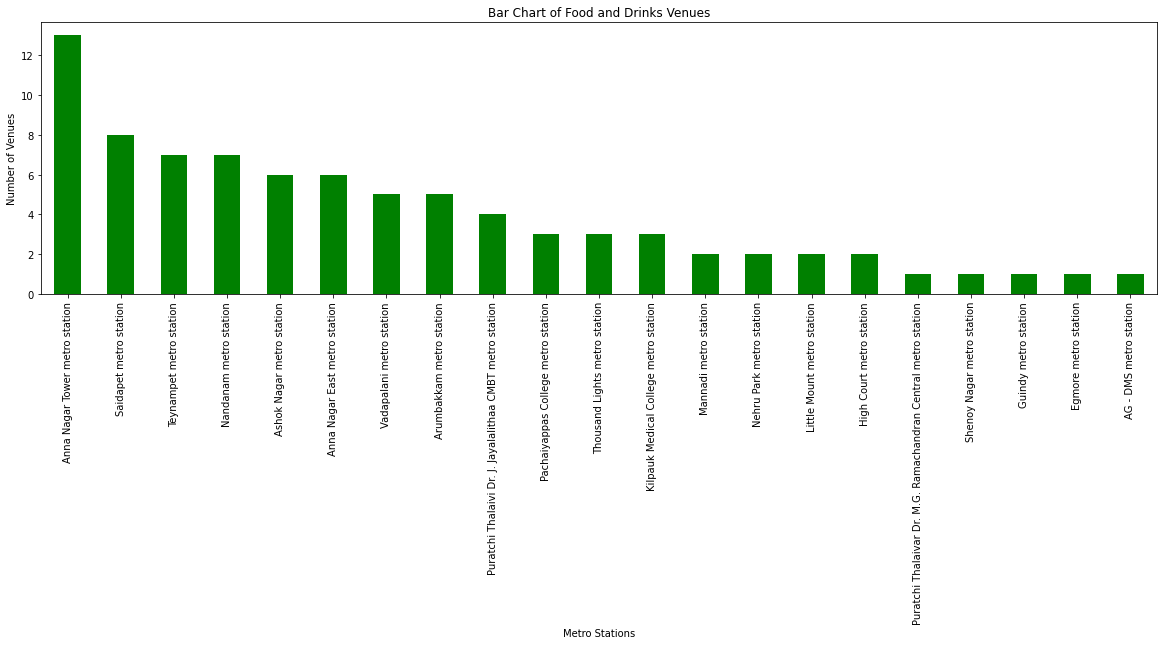

                                Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                    
Anna Nagar Tower metro station                     13                      13   
Saidapet metro station                              8                       8   
Teynampet metro station                             7                       7   
Nandanam metro station                              7                       7   
Ashok Nagar metro station                           6                       6   

                                Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                             
Anna Nagar Tower metro station     13              13               13   
Saidapet metro station              8               8                8   
Teynampet metro station             7               7                7   
Nandanam metro station              7               7         

In [15]:
PlotMetroByVenues('Food and Drinks','green')

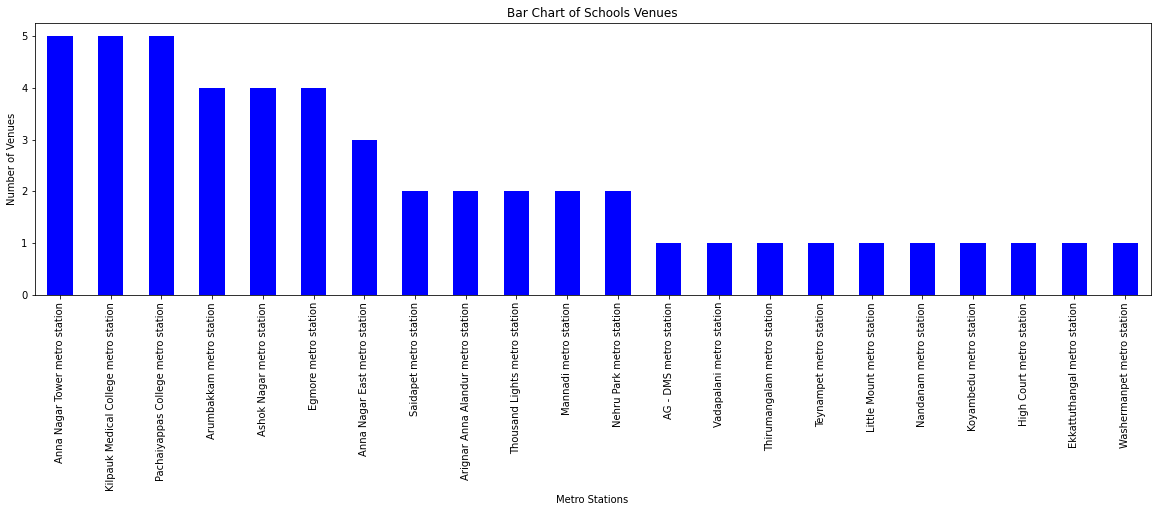

                                       Neighborhood Latitude  \
Neighborhood                                                   
Anna Nagar Tower metro station                             5   
Kilpauk Medical College metro station                      5   
Pachaiyappas College metro station                         5   
Arumbakkam metro station                                   4   
Ashok Nagar metro station                                  4   

                                       Neighborhood Longitude  Venue  \
Neighborhood                                                           
Anna Nagar Tower metro station                              5      5   
Kilpauk Medical College metro station                       5      5   
Pachaiyappas College metro station                          5      5   
Arumbakkam metro station                                    4      4   
Ashok Nagar metro station                                   4      4   

                                       Venue L

In [16]:
PlotMetroByVenues('Schools','blue')

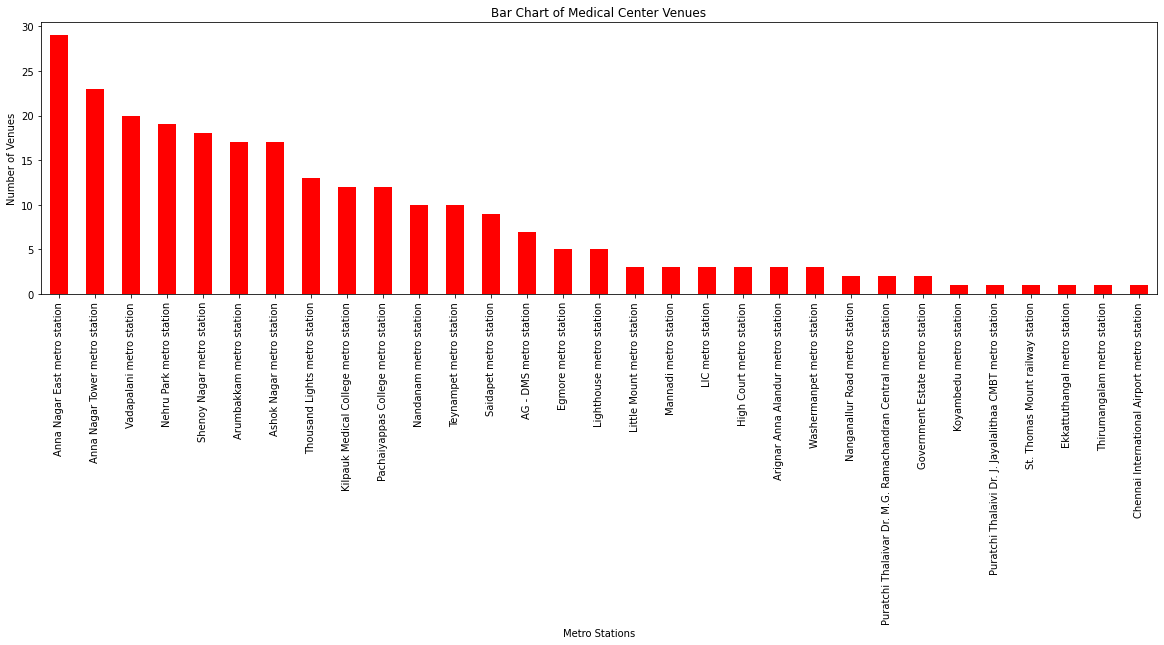

                                Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                    
Anna Nagar East metro station                      29                      29   
Anna Nagar Tower metro station                     23                      23   
Vadapalani metro station                           20                      20   
Nehru Park metro station                           19                      19   
Shenoy Nagar metro station                         18                      18   

                                Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                             
Anna Nagar East metro station      29              29               29   
Anna Nagar Tower metro station     23              23               23   
Vadapalani metro station           20              20               20   
Nehru Park metro station           19              19         

In [17]:
PlotMetroByVenues('Medical Center','red')

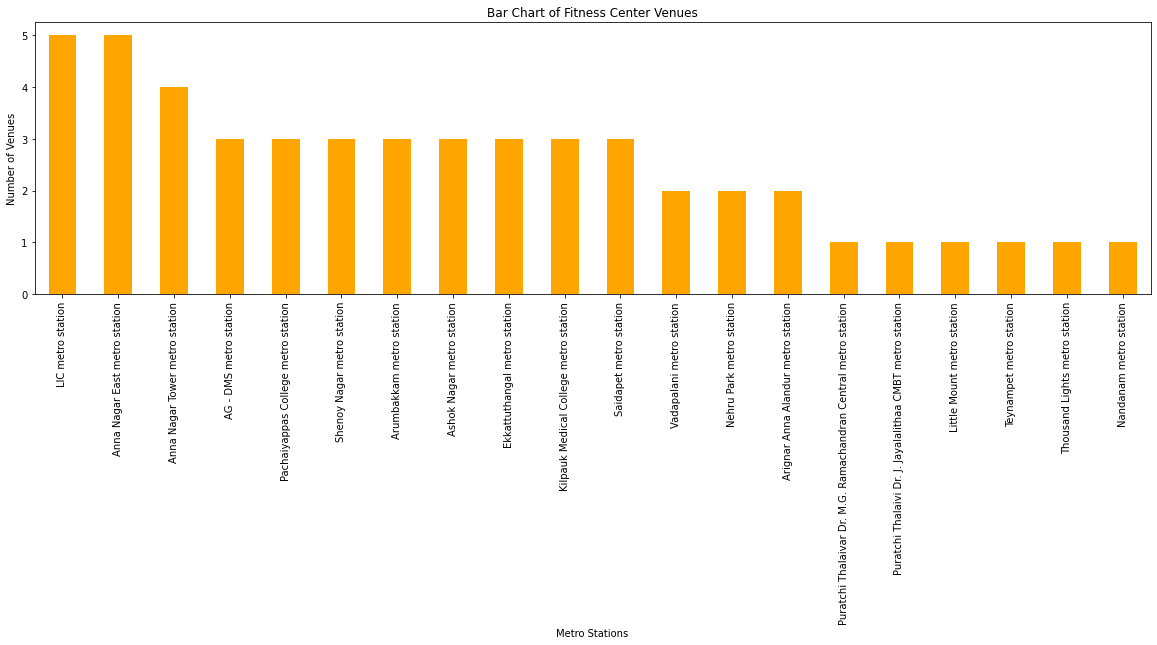

                                    Neighborhood Latitude  \
Neighborhood                                                
LIC metro station                                       5   
Anna Nagar East metro station                           5   
Anna Nagar Tower metro station                          4   
AG - DMS metro station                                  3   
Pachaiyappas College metro station                      3   

                                    Neighborhood Longitude  Venue  \
Neighborhood                                                        
LIC metro station                                        5      5   
Anna Nagar East metro station                            5      5   
Anna Nagar Tower metro station                           4      4   
AG - DMS metro station                                   3      3   
Pachaiyappas College metro station                       3      3   

                                    Venue Latitude  Venue Longitude  \
Neighborhood     

In [18]:
PlotMetroByVenues('Fitness Center','orange')

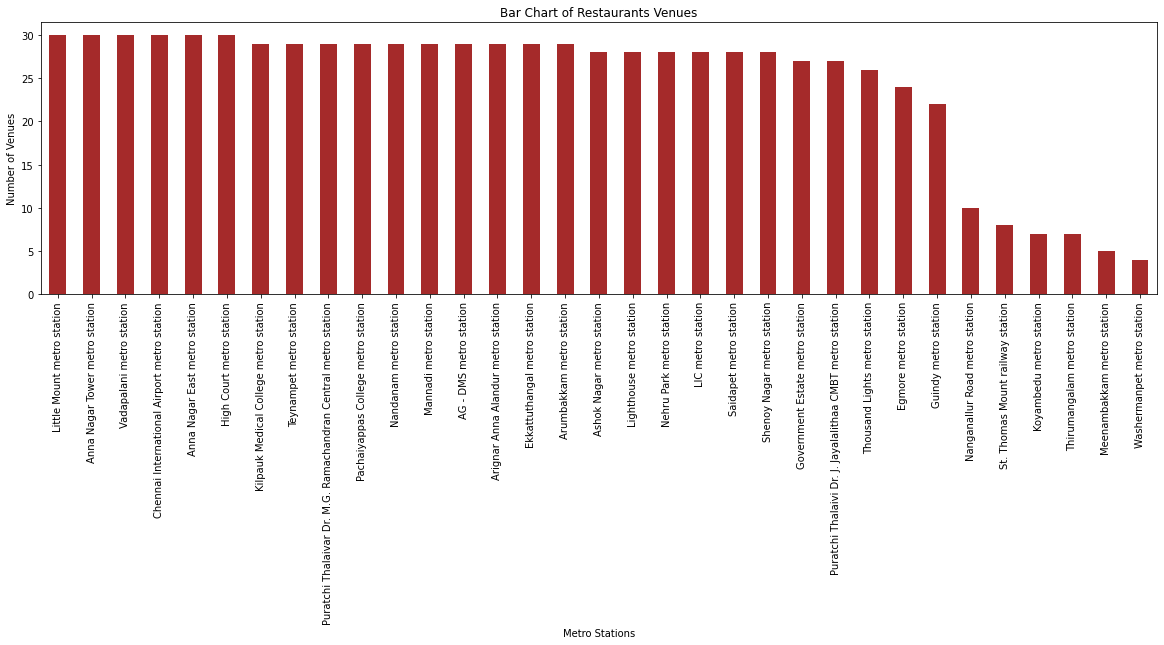

                                             Neighborhood Latitude  \
Neighborhood                                                         
Little Mount metro station                                      30   
Anna Nagar Tower metro station                                  30   
Vadapalani metro station                                        30   
Chennai International Airport metro station                     30   
Anna Nagar East metro station                                   30   

                                             Neighborhood Longitude  Venue  \
Neighborhood                                                                 
Little Mount metro station                                       30     30   
Anna Nagar Tower metro station                                   30     30   
Vadapalani metro station                                         30     30   
Chennai International Airport metro station                      30     30   
Anna Nagar East metro station            

In [19]:
PlotMetroByVenues('Restaurants','brown')

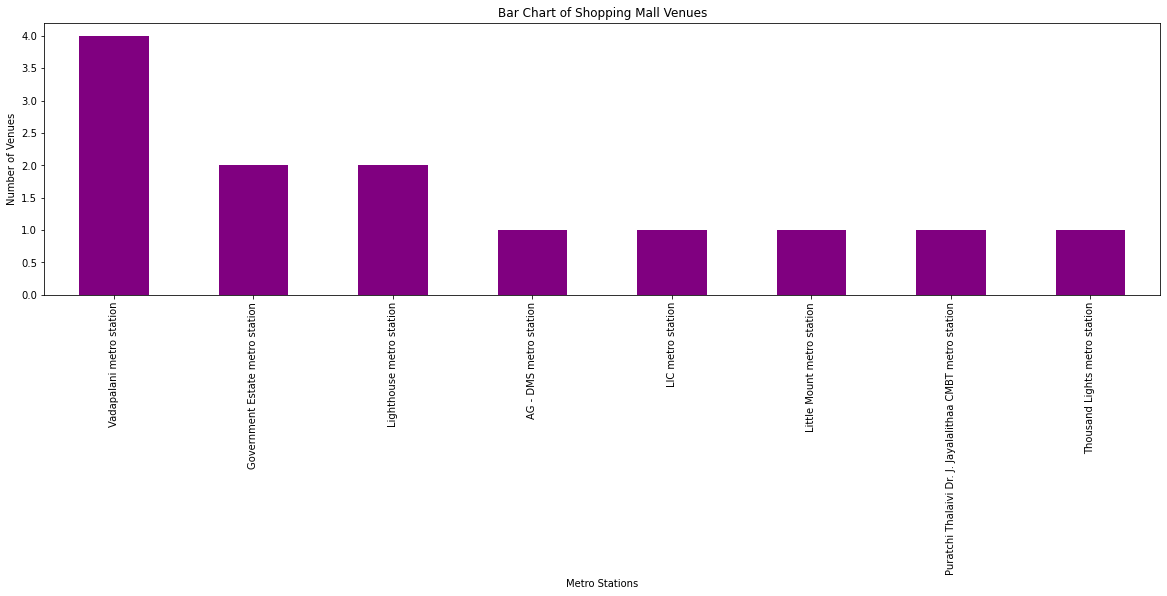

                                 Neighborhood Latitude  \
Neighborhood                                             
Vadapalani metro station                             4   
Government Estate metro station                      2   
Lighthouse metro station                             2   
AG - DMS metro station                               1   
LIC metro station                                    1   

                                 Neighborhood Longitude  Venue  \
Neighborhood                                                     
Vadapalani metro station                              4      4   
Government Estate metro station                       2      2   
Lighthouse metro station                              2      2   
AG - DMS metro station                                1      1   
LIC metro station                                     1      1   

                                 Venue Latitude  Venue Longitude  \
Neighborhood                                                  

In [20]:
PlotMetroByVenues('Shopping Mall','purple')

### Create Dataframe with features as columns

In [21]:
metro_venues_cat = metro_venues.groupby(['Neighborhood','Venue Category'],as_index=False).count() 

columns=["Metro Station","Latitude","Longitude","Food and Drinks","Schools","Medical Center","Fitness Center","Restaurants","Shopping Mall"]
metro_cat_df = pd.DataFrame(columns = columns)

In [22]:
metro = []


for row in metro_venues_cat.Neighborhood.unique():
    d1 = metro_venues[metro_venues['Neighborhood'] == row]
    lat = d1.iloc[0,1]
    long = d1.iloc[0,2]
    metro_cat_v1 = metro_venues_cat[metro_venues_cat['Venue Category']=='Food and Drinks'][metro_venues_cat['Neighborhood']==row]
    metro_cat_v2 = metro_venues_cat[metro_venues_cat['Venue Category']=='Schools'][metro_venues_cat['Neighborhood']==row]
    metro_cat_v3 = metro_venues_cat[metro_venues_cat['Venue Category']=='Medical Center'][metro_venues_cat['Neighborhood']==row]
    metro_cat_v4 = metro_venues_cat[metro_venues_cat['Venue Category']=='Fitness Center'][metro_venues_cat['Neighborhood']==row]
    metro_cat_v5 = metro_venues_cat[metro_venues_cat['Venue Category']=='Restaurants'][metro_venues_cat['Neighborhood']==row]
    metro_cat_v6 = metro_venues_cat[metro_venues_cat['Venue Category']=='Shopping Mall'][metro_venues_cat['Neighborhood']==row]
    
    try:
      metro_cat_v1_val = metro_cat_v1['Neighborhood Latitude'].iloc[0]
    except:
      metro_cat_v1_val =  0
    try:
      metro_cat_v2_val = metro_cat_v2['Neighborhood Latitude'].iloc[0]
    except:
      metro_cat_v2_val =  0
    try:
      metro_cat_v3_val = metro_cat_v3['Neighborhood Latitude'].iloc[0]
    except:
      metro_cat_v3_val =  0
    try:
      metro_cat_v4_val = metro_cat_v4['Neighborhood Latitude'].iloc[0]
    except:
      metro_cat_v4_val = 0
    try:
      metro_cat_v5_val = metro_cat_v5['Neighborhood Latitude'].iloc[0]
    except:
      metro_cat_v5_val =  0
    try:
      metro_cat_v6_val = metro_cat_v6['Neighborhood Latitude'].iloc[0]
    except:
      metro_cat_v6_val =  0
    metro.append([row,lat,long,metro_cat_v1_val,metro_cat_v2_val,metro_cat_v3_val,metro_cat_v4_val,metro_cat_v5_val,metro_cat_v6_val])
    #metro.append([row,metro_cat_v1_val,metro_cat_v2_val,metro_cat_v3_val,metro_cat_v4_val,metro_cat_v5_val,metro_cat_v6_val])
    dfMetro = pd.DataFrame(metro, columns = columns)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/jup

In [23]:
dfMetro.set_index(dfMetro.columns[0],inplace=True)
dfMetro.head()

,Latitude,Longitude,Food and Drinks,Schools,Medical Center,Fitness Center,Restaurants,Shopping Mall
Metro Station,,,,,,,,
AG - DMS metro station,13.045515,80.248436,1,1,7,3,29,1
Anna Nagar East metro station,13.085080,80.218646,6,3,29,5,30,0
Anna Nagar Tower metro station,13.085226,80.208746,13,5,23,4,30,0
Arignar Anna Alandur metro station,13.004859,80.201483,0,2,3,2,29,0
Arumbakkam metro station,13.085245,80.201590,5,4,17,3,29,0


### Categorize Metro stations using K-means algorithm

In [24]:
# set number of clusters
kclusters = 3

#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfMetro)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50] 

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1,
       1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2], dtype=int32)

In [25]:
# add clustering labels
dfMetro.insert(0, 'Cluster Labels', kmeans.labels_)
dfMetro.head()


,Cluster Labels,Latitude,Longitude,Food and Drinks,Schools,Medical Center,Fitness Center,Restaurants,Shopping Mall
Metro Station,,,,,,,,,
AG - DMS metro station,0,13.045515,80.248436,1,1,7,3,29,1
Anna Nagar East metro station,1,13.085080,80.218646,6,3,29,5,30,0
Anna Nagar Tower metro station,1,13.085226,80.208746,13,5,23,4,30,0
Arignar Anna Alandur metro station,0,13.004859,80.201483,0,2,3,2,29,0
Arumbakkam metro station,1,13.085245,80.201590,5,4,17,3,29,0


In [26]:
# Rename cluster lables to 'red', 'green' and 'blue'
dfMetro['Cluster Labels'].replace([0, 1, 2], ['red', 'blue', 'green'],inplace=True)

### Display Metro stations on Chennai Map with categorization colors 

In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
#clustercol = 5
for lat, lon, poi, cluster in zip(dfMetro['Latitude'], dfMetro['Longitude'], dfMetro.index, dfMetro['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=cluster,#dfMetro['Cluster Labels'],#rainbow[clustercol-1],
        fill=True,
        fill_color=cluster,#dfMetro['Cluster Labels'],#rainbow[clustercol-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Get mean of all features for each category

In [28]:
dfMetro.groupby('Cluster Labels').mean()

,Latitude,Longitude,Food and Drinks,Schools,Medical Center,Fitness Center,Restaurants,Shopping Mall
Cluster Labels,,,,,,,,
blue,13.061636,80.229068,5.307692,2.692308,16.076923,2.615385,28.692308,0.384615
green,13.041475,80.205945,0.000000,0.500000,1.333333,0.000000,6.833333,0.000000
red,13.047800,80.241820,1.000000,0.857143,2.785714,1.142857,27.928571,0.571429


In [30]:
dfMetro

,Cluster Labels,Latitude,Longitude,Food and Drinks,Schools,Medical Center,Fitness Center,Restaurants,Shopping Mall
Metro Station,,,,,,,,,
AG - DMS metro station,red,13.045515,80.248436,1,1,7,3,29,1
Anna Nagar East metro station,blue,13.085080,80.218646,6,3,29,5,30,0
Anna Nagar Tower metro station,blue,13.085226,80.208746,13,5,23,4,30,0
Arignar Anna Alandur metro station,red,13.004859,80.201483,0,2,3,2,29,0
Arumbakkam metro station,blue,13.085245,80.201590,5,4,17,3,29,0
Ashok Nagar metro station,blue,13.035452,80.211194,6,4,17,3,28,0
Chennai International Airport metro station,red,12.981076,80.164156,0,0,1,0,30,0
Egmore metro station,red,13.080281,80.263055,1,4,5,0,24,0
Ekkattuthangal metro station,red,13.016922,80.205424,0,1,1,3,29,0


<b>About Author:</b>

<b>Sanjay Kannu Periyasami- Manager Software Development</b> (Data Enthusiast)